In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'png'
%matplotlib inline

In [2]:
train = pd.read_csv("/home/vivek/Documents/Datasets/House Price Prediction/train.csv")
test = pd.read_csv("/home/vivek/Documents/Datasets/House Price Prediction/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
sns.set(style = 'whitegrid',color_codes=True)
sns.set(font_scale=1)

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# How many columns with different datatypes
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [8]:
# Statistical Description
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# check the column names
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

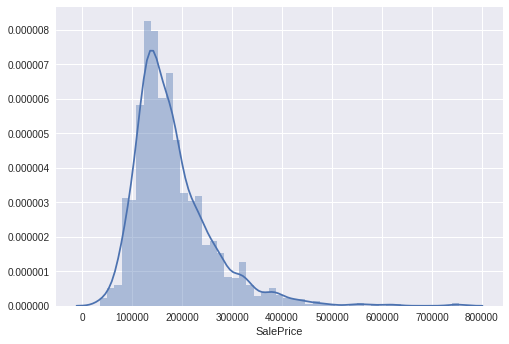

In [11]:
# Histogram
sns.distplot(train['SalePrice']);

In [12]:
# Skewness and Kurtosis
print ("Skewness: %f" % train["SalePrice"].skew())
print ("Kurtosis: %f" % train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


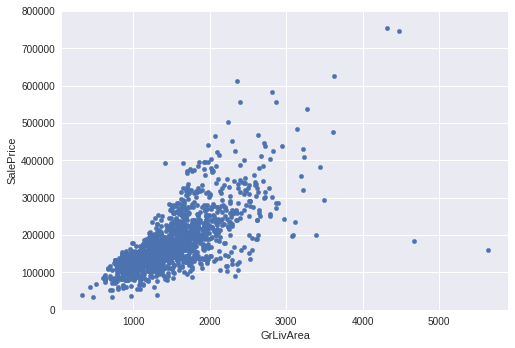

In [13]:
# Scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train["SalePrice"],train[var]], axis=1)
data.plot.scatter(x=var, y = 'SalePrice', ylim=(0,800000));

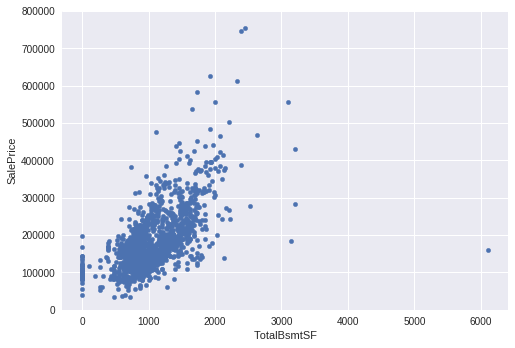

In [14]:
# Scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y= 'SalePrice', ylim=(0,800000));

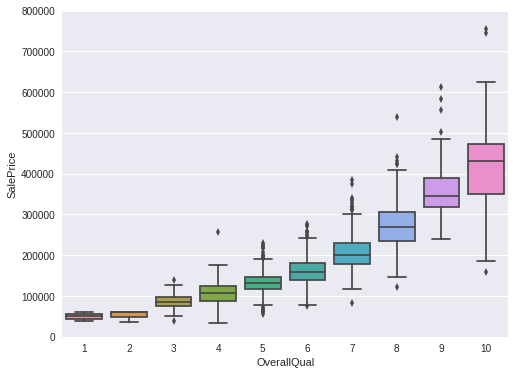

In [15]:
# box plot overallqual/SalePrice (house's overall quality of the house)
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0,ymax=800000);

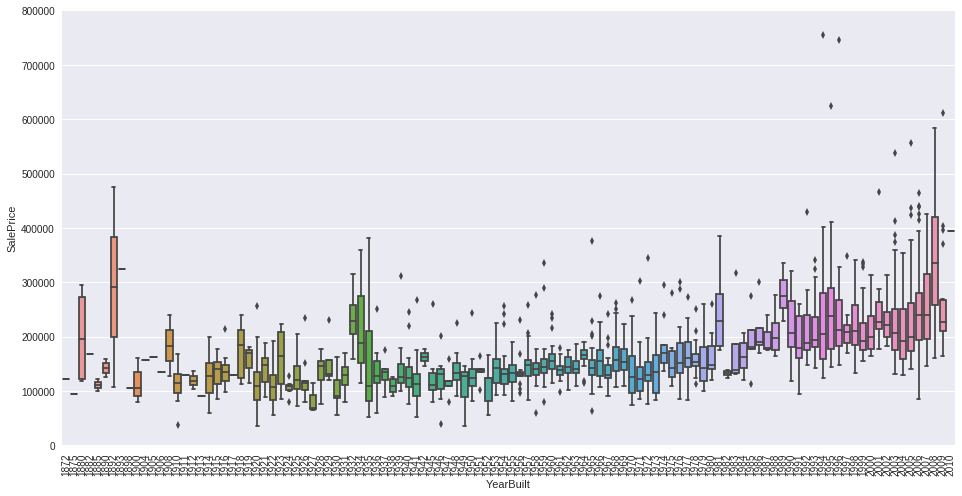

In [16]:
# Checking price changes according to year changes
var = 'YearBuilt'
data = pd.concat([train['SalePrice'],train[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))  # figsize would be 16(length) and 8(width)
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90); # xticks means x-axis label and specified angle

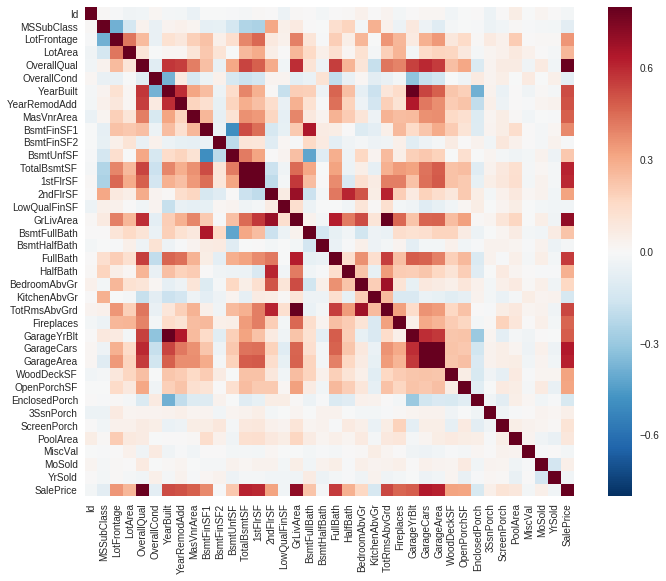

In [17]:
# Correlation matrix (Heat Map)
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 0.8, square=True);

Above, There are two red color squares which are highly correlated. First one is 'TotalBsmtSF' and '1stFlrSF' variables, and Second is 'GarageX' variables.Actually this correlation is so strong that it can indicate situation of multicollinearity. If we think about these variables, we can conclude that they give the same information so multicollinearity really occurs.

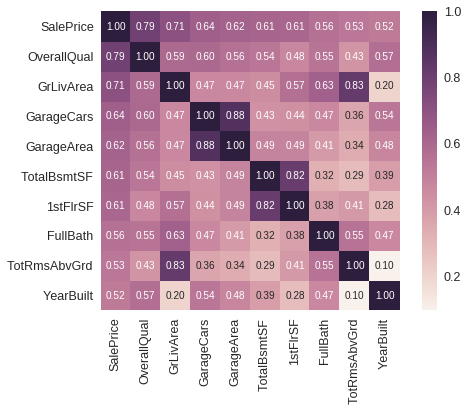

In [18]:
# Sale Price Correlation matrix
k = 10 # No of variables for heat map

# take highest correlated variables with including 'SalePrice'
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index  
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25) # font size of the font in below correlation matrix
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels = cols.values)
plt.show()

### Scatter Plots between 'SalePrice' and Correlated Variables

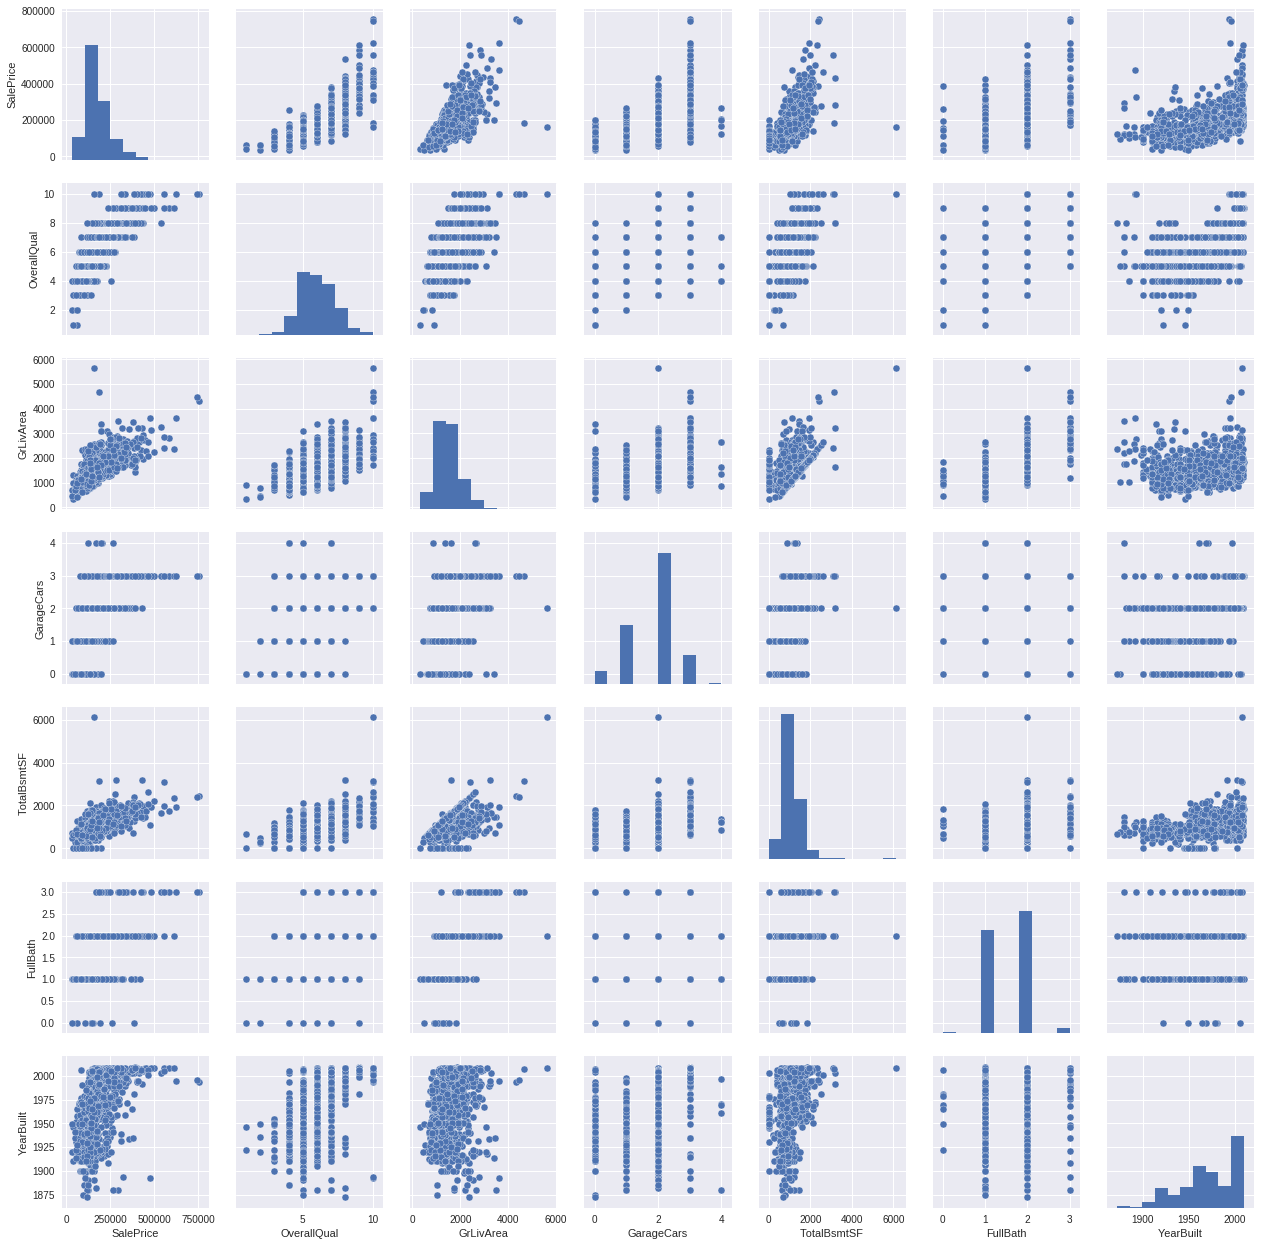

In [19]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols], size=2.5) # pairplot- plot with each variables we mention above
plt.show();

## Missing Data

In [20]:
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['total','Percent'])
missing_data.head(20)

,total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


We will consider that more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. We can see that "GarageX" variable have the same number of missing data(and we presume that this missing data refers to the same set of observations) and most important information regarding garage is expressed by 'GarageCars' and considering that we will delete other variables. This same logic appolies to "BsmtX" variables.
Regarding "MasVnrArea' and "MasVnrType", we will consider that these variables are not essential and furthermore they have strong correlation with 'YearBuilt' and "OverallQual" which are already considered. Thus we will not loose any information if we delete "MasVnrArea" and "MasVnrType".

Finally, we have one missing obseravation in 'Electrical'. Since, it is just one observation, we'll delete this observation and keep this variable.

In [21]:
train = train.drop((missing_data[missing_data["total"]>1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

## Outliers

### Univariate Analysis
We will Standardize the data. In this context, data standardization means converting data values to have mean 0 and standard deviation of 1.

In [22]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:5]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-5:]
print ('outer range(low) of the distribution: ')
print(low_range)
print ("\nouter range(high) of the distribution: ")
print (high_range)

outer range(low) of the distribution: 
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]]

outer range(high) of the distribution: 
[[ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


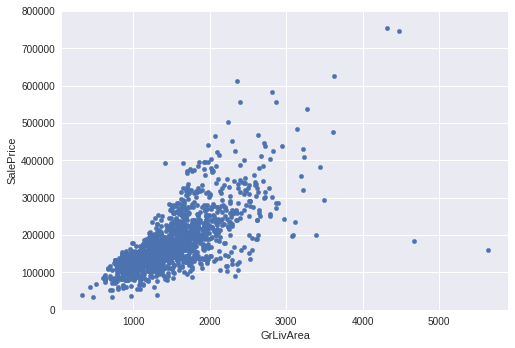

In [23]:
# Bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train["SalePrice"], train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim = (0,800000));

The two values with bigger 'GrLivArea' seem strange and they are not following the crowed and these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

In [24]:
# deleting the points
train.sort_values(by = 'GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [25]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 523].index)

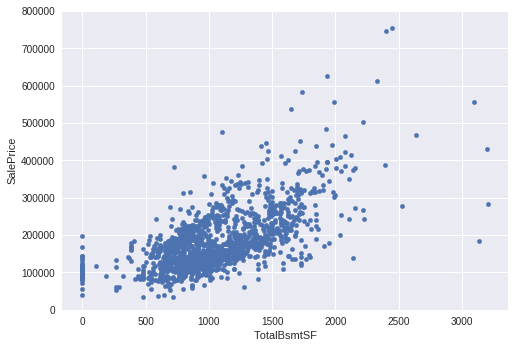

In [26]:
# Bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x = var, y = 'SalePrice', ylim=(0,800000));

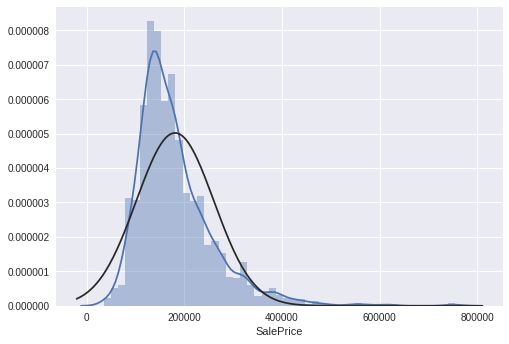

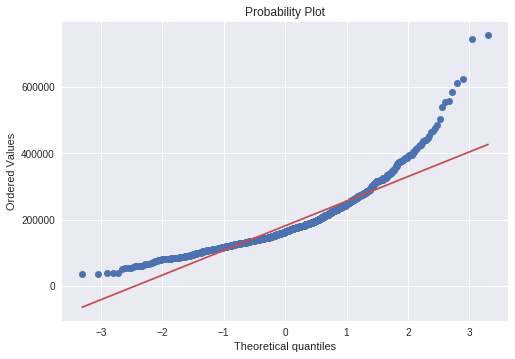

In [27]:
# Histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm); # this fit=norm will show normal distribution line
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt) # same as above, red line shows normal distribution

In [28]:
# Applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

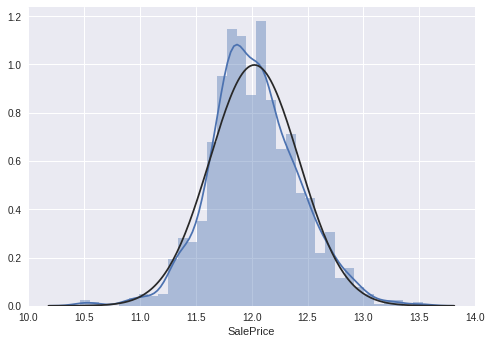

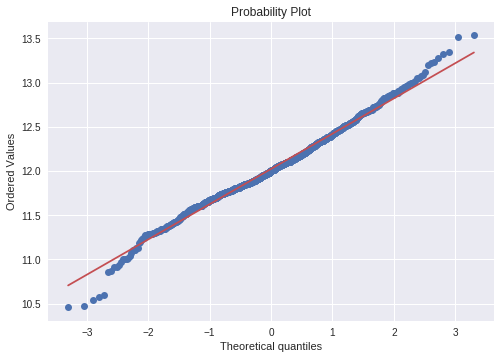

In [29]:
# transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

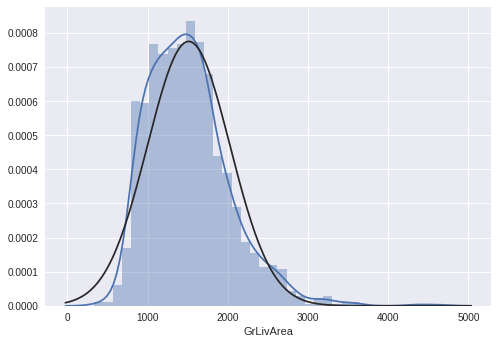

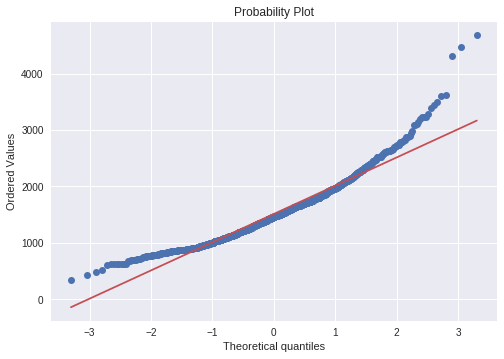

In [30]:
# Now let's check 'GrLivArea'
# Histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [31]:
# above look like skewness
train['GrLivArea'] = np.log(train['GrLivArea'])

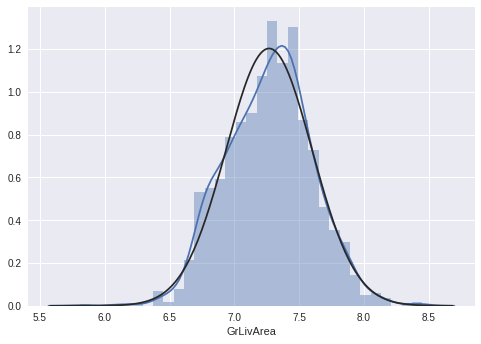

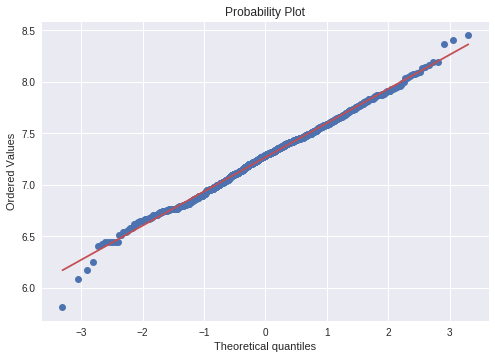

In [32]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

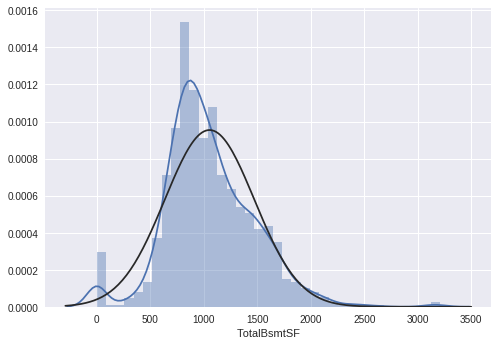

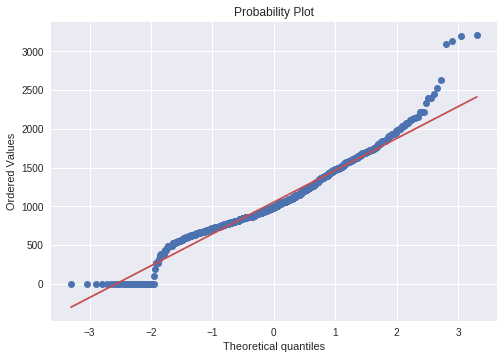

In [33]:
# For TotalBsmtSF (Histogram and probability plot)
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

Here there are some issues we have to consider.
* In general presents skewness
* A significant number of observation with value zero (houses without basement) and zero(0) doesn't allow us to do log transformation.

To apply log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observation, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [34]:
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0
train.loc[train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [35]:
# Transform the data (apply log transformation to )
train.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

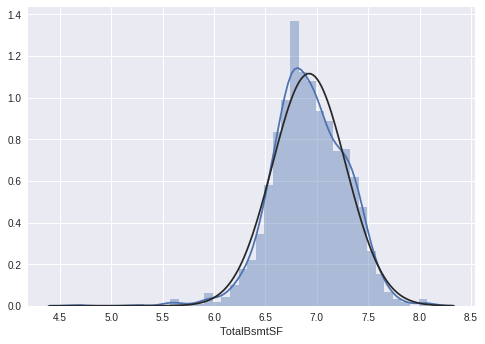

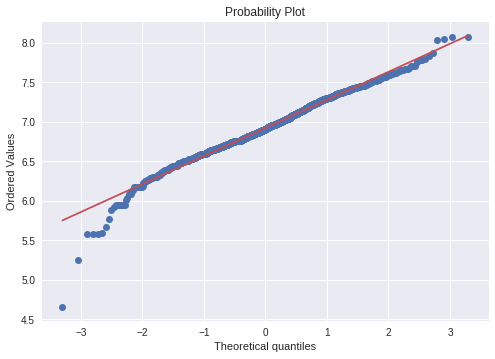

In [36]:
# histogram and probability plot
sns.distplot(train['TotalBsmtSF'][train['TotalBsmtSF']>0],fit=norm);
# ['TotalBsmtSF][train['TotalBsmtSF]] location won't matter for both plots(below as well)
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

In Search for homoscedasticity graphically. Departures from an equal dispersion are shown by such shape as cones(small dispersion at one side of graph, large dispersion at other side of graph) or diamonds (a large number of points at the center of the distribution)

Starting with 'Sale Price' and 'GrLivArea'

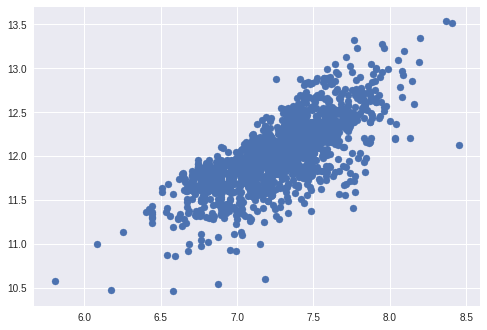

In [39]:
# Scatter plot
plt.scatter(train['GrLivArea'],train['SalePrice'])

As we can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality!! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'

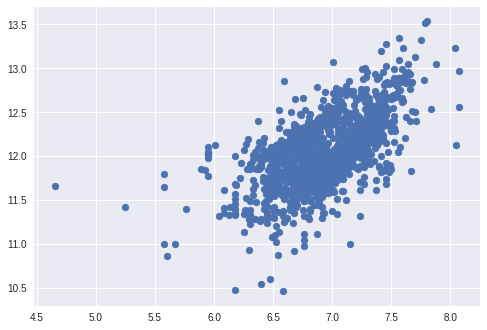

In [41]:
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exihibit equal levels of variance across the range of 'TotalBsmtSF'